# # Background
this dataset gotten from Kaggle contains terrorism information from 1970 to 2017 collated by the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland. In this notebook, Exploratorydata analysis has been done with regards to terrorism as it affects Nigeria and the Sub-Sahara region of Africa. Feature such as Weapon  type, Attack type and the targets of terrorism activities have been looked at.

The dscription of some major features on the dataset are as follows:

Year: year of the incident. (numerical) 

Month: month number of the incident. (numerical)

Day: day number of the incident. (numerical)

Country: Country name. (object)

City: The city where the act executed. (categorical)

AttackType: The type of the act (Bombing/Explosion, Armed Assault, Facility/Infrastructure Attack, Hostage Taking (Kidnapping), Hijacking, Assassination, Unknown, Hostage Taking (Barricade Incident), Unarmed Assault) (categorical)

Killed: Number of the people that died in the incident. (numerical)

Wounded: Number of the people that wounded in the act. (numerical)

Casualties: A combination of the killed and wounded features (numerical)

Target: The name of the target. (object)

Group: The terrorist group that executed the terrorist act. (categorical)

TargetType: Target type. (Airports & Aircraft, Military, Government (Diplomatic), Business, Police, Government (General), Private Citizens & Property, Educational Institution, Journalists & Media, Violent Political Party, Tourists, Transportation, Utilities, NGO, Unknown, Religious Figures/Institutions, Telecommunication, Food or Water Supply, Maritime, Terrorists/Non-State Militia, Other) (categorical)

WeaponType: The type of the weapon used in the act. (Explosives, Incendiary, Firearms, Unknown, Melee, Chemical, Fake Weapons, Sabotage Equipment, Other) (categorical)

In [ ]:
#Import important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sns.set_style("ticks")
import chardet
from collections import Counter
import array as arr
import fuzzywuzzy
from fuzzywuzzy import process
sns.set(style="darkgrid")

In [ ]:
#Find the type of encoding used for the dataset
with open ("./CSV files/globalterrorismdb_0718dist.csv", "rb") as rawdata:
    result = chardet.detect(rawdata.read(100000))
    
print(result)

In [11]:
#import and view dataset 
df_terrorism = pd.read_csv("./CSV files/globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1", low_memory=False)
df_terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df_terrorism.shape

(181691, 135)

In [ ]:
df_terrorism.columns.values

In [12]:
df_terrorism.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive', 'alternative' : 'Alternatives'},inplace=True)
df_terrorism["Casualties"] = df_terrorism["Killed"] + df_terrorism["Wounded"]

In [14]:
df_terrorism.describe()

,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casualties
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000,164817.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952,5.296128
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325,42.069023
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000,9574.000000


In [15]:
df_terrorism["Day"] = df_terrorism["Day"].replace(to_replace=0, value=1)
df_terrorism["Month"] = df_terrorism["Month"].replace(to_replace=0, value=2)

In [16]:
df_terrorism["Date"] = df_terrorism["Month"].astype(str) + "-" + df_terrorism["Day"].astype(str) + "-" + df_terrorism["Year"].astype(str)

In [16]:
df_terrorism.sample(n = 10)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Date
72654,200108120006,2001,8,12,NaN,0,NaN,93,Indonesia,5,...,Violence in Indonesia's separatist-plagued Ac...,NaN,NaN,CETIS,0,0,0,0,"200108120006, 200108120004, 200108120005",8-12-2001
41135,199001080001,1990,1,8,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,1-8-1990
123245,201311100039,2013,11,10,NaN,1,NaN,92,India,6,...,"""Abducted coal exporter rescued,"" The Sentinel...","""Coal trader rescued on border,"" Calcutta Tele...","""BSF rescues abducted coal exporter,"" Daijiwor...",START Primary Collection,0,0,0,0,NaN,11-10-2013
124671,201312150059,2013,12,15,NaN,0,NaN,95,Iraq,10,...,"""8 killed, 35 wounded in bombing attacks i...","""*Officials: Gunmen kill family of 5 in Iraq,""...",NaN,START Primary Collection,-9,-9,0,-9,NaN,12-15-2013
76854,200408030006,2004,8,3,NaN,0,NaN,141,Nepal,6,...,"Maoists torch bus in central Nepal, Nepalne...",NaN,NaN,CETIS,-9,-9,0,-9,NaN,8-3-2004
98262,201009180040,2010,9,18,NaN,0,NaN,4,Afghanistan,6,...,"National Counterterrorism Center, ""Polling Cen...","Naweed Waqif, Violence Scares Residents Away ...",NaN,ISVG,0,0,0,0,NaN,9-18-2010
153801,201510040035,2015,10,4,NaN,0,NaN,113,Libya,10,...,"""Libya Translations Weekly digest Arab Media O...",NaN,NaN,START Primary Collection,0,0,0,0,"201510040033, 201510040034, 201510040035, 2015...",10-4-2015
61862,199603110002,1996,3,11,NaN,0,NaN,186,Sri Lanka,6,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,3-11-1996
51327,199205060026,1992,5,6,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,5-6-1992
113347,201301020028,2013,1,2,NaN,0,NaN,160,Philippines,5,...,"""City councilor shot dead in San Pablo, bodygu...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,1-2-2013


In [20]:
swet = df_terrorism.isnull().sum()

In [29]:
df_terrorism["Weapon_type"] = df_terrorism["Weapon_type"].replace(to_replace="Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)", value="Vehicle")

In [121]:
df_terrorism.Region.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [21]:
df_terrorism["Date"] = pd.to_datetime(df_terrorism["Date"])

In [22]:
df_terrorism["Date"].dtype

dtype('<M8[ns]')

In [23]:
sort  = df_terrorism.sort_values(by=["Country", "Region"], ascending = [True,True])
sort

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Date
1863,197305010002,1973,5,1,NaN,0,NaN,4,Afghanistan,6,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,1973-05-01
7627,197902140010,1979,2,14,NaN,0,NaN,4,Afghanistan,6,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1979-02-14
9156,197908270005,1979,8,27,NaN,0,NaN,4,Afghanistan,6,...,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,1979-08-27
9218,197909090001,1979,9,9,NaN,0,NaN,4,Afghanistan,6,...,NaN,NaN,NaN,PGIS,-9,-9,-9,-9,NaN,1979-09-09
31132,198705310003,1987,5,31,NaN,0,NaN,4,Afghanistan,6,...,NaN,NaN,NaN,CBRN Global Chronology,0,0,0,0,NaN,1987-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125189,201312290010,2013,12,29,NaN,0,NaN,231,Zimbabwe,11,...,"""Arsonists target Chronicle building,"" Zimbabw...","""Arsonists target Mpofu, Chronicle buildings,""...",NaN,START Primary Collection,-9,-9,0,-9,NaN,2013-12-29
127886,201402250012,2014,2,25,NaN,0,NaN,231,Zimbabwe,11,...,"""Petrol bomb attack on home of top Zimbabw...","""Lawmaker boycott threat, MDC infighting domin...","""Zimbabwe opposition lawmaker?s house petrol-b...",START Primary Collection,0,0,0,0,NaN,2014-02-25
176881,201707120016,2017,7,12,NaN,0,NaN,231,Zimbabwe,11,...,"""Stop violence, Mugabe told following 'savage ...","""Zimbabwean opposition leaders attacked ahead ...","""MDC Tsvangirai Youth Assembly Vehicle Petrol ...",START Primary Collection,0,0,0,0,NaN,2017-07-12
177097,201707180028,2017,7,19,NaN,0,NaN,231,Zimbabwe,11,...,"""Mudzuri blames Zanu PF for arson attack,"" Zim...","""Stop violence, Mugabe told following 'savage ...","""Zimbabwean opposition leaders attacked ahead ...",START Primary Collection,0,0,0,0,NaN,2017-07-19


In [31]:
sub_sahara = df_terrorism[df_terrorism["Region"]=="Sub-Saharan Africa"]
sub_sahara.iloc[0:20, 7:16]

,country,Country,region,Region,provstate,City,latitude,longitude,specificity
16,65,Ethiopia,11,Sub-Saharan Africa,Unknown,Unknown,NaN,NaN,5.0
132,65,Ethiopia,11,Sub-Saharan Africa,Unknown,Unknown,NaN,NaN,5.0
165,65,Ethiopia,11,Sub-Saharan Africa,Unknown,Unknown,NaN,NaN,5.0
668,230,Zambia,11,Sub-Saharan Africa,Unknown,Unknown,NaN,NaN,5.0
679,65,Ethiopia,11,Sub-Saharan Africa,Amhara,Bahar Dar,11.583513,37.397019,1.0
1526,604,Zaire,11,Sub-Saharan Africa,Kinshasa,Kinshasa,-4.389166,15.337620,1.0
1527,604,Zaire,11,Sub-Saharan Africa,Kinshasa,Kinshasa,-4.389166,15.337620,1.0
1528,604,Zaire,11,Sub-Saharan Africa,Kinshasa,Kinshasa,-4.389166,15.337620,1.0
1536,605,People's Republic of the Congo,11,Sub-Saharan Africa,Brazzaville,Brazzaville,-4.225356,15.251060,1.0
1720,65,Ethiopia,11,Sub-Saharan Africa,Eritrea,Unknown,15.027339,39.782691,4.0


In [99]:
sub_sahara.Group.value_counts().index[0:30]

Index(['Unknown', 'Al-Shabaab', 'Boko Haram',
       'African National Congress (South Africa)', 'Fulani extremists',
       'National Union for the Total Independence of Angola (UNITA)',
       'Lord's Resistance Army (LRA)',
       'Mozambique National Resistance Movement (MNR)',
       'Allied Democratic Forces (ADF)', 'Janjaweed', 'Hutu extremists',
       'Sudan People's Liberation Movement in Opposition (SPLM-IO)',
       'Democratic Front for the Liberation of Rwanda (FDLR)',
       'Movement for the Emancipation of the Niger Delta (MEND)',
       'Muslim extremists', 'Movement of Democratic Forces of Casamance',
       'Al-Qaida in the Islamic Maghreb (AQIM)', 'Anti-Balaka Militia',
       'Mayi Mayi', 'Revolutionary United Front (RUF)',
       'South-West Africa People's Organization (SWAPO)',
       'Jamaat Nusrat al-Islam wal Muslimin (JNIM)',
       'Sudan People's Liberation Movement - North', 'Ansar al-Dine (Mali)',
       'Inkatha Freedom Party (IFP)', 'Niger Delta Aveng

In [32]:
naija_nig=df_terrorism[df_terrorism["Country"] == "Nigeria"]
naija_nig.iloc[0:20, 7:16]
naija_nig.shape

(3907, 137)

## Data visualization of terrorism in Nigeria and Sub-Saharan Africa

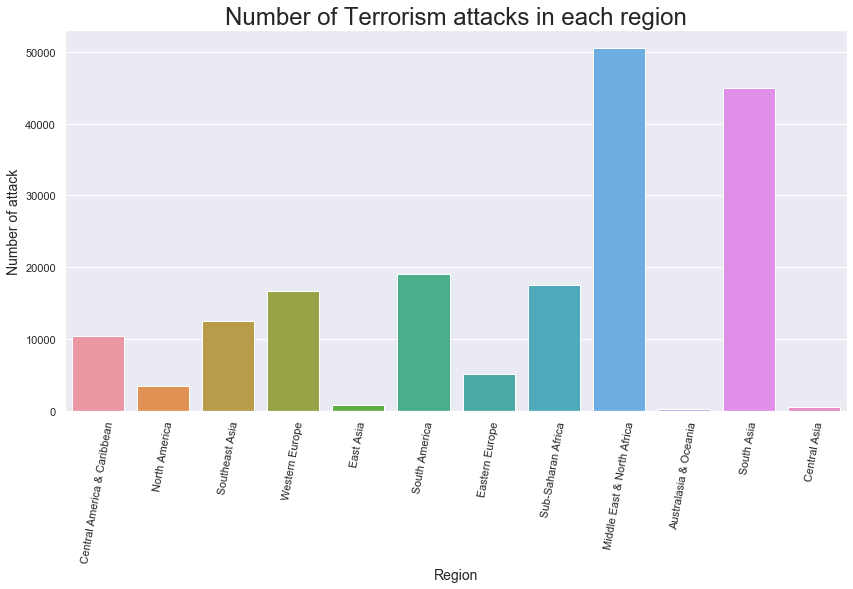

In [26]:
#The plot below shows the the total number of terrorism attacks for each region
plt.figure(figsize = (14,7))
plot = sns.countplot(df_terrorism["Region"])
plt.xlabel("Region", fontsize = 14)
plt.ylabel("Number of attack", fontsize = 14)
plt.title("Number of Terrorism attacks in each region", fontsize = 24)
plot.set_xticklabels(plot.get_xticklabels(), rotation=80);

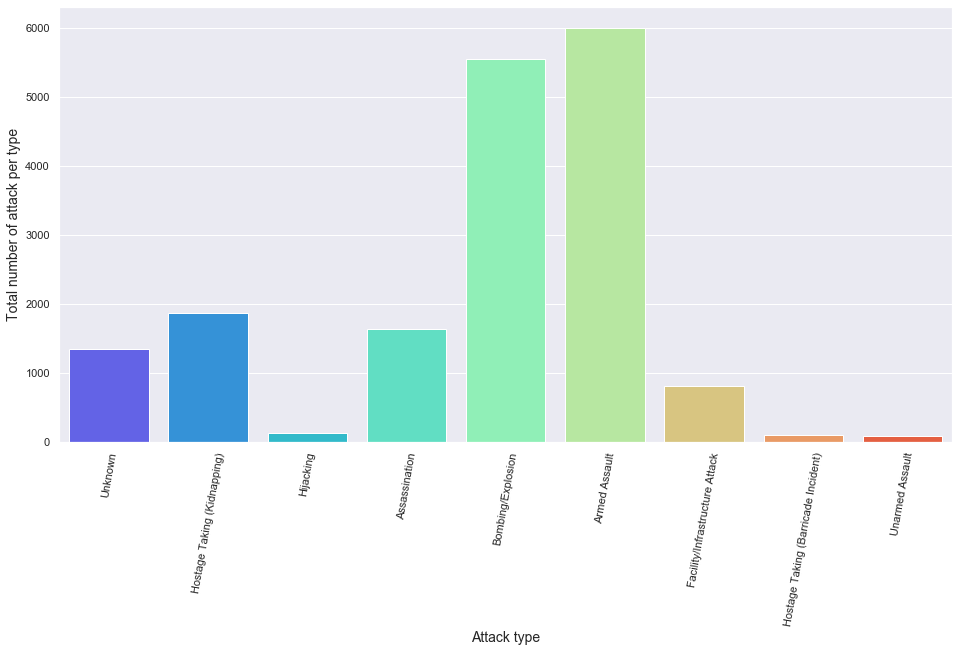

In [27]:
#This plot shows the attack types used in the Sub-Saharan region
plt.figure(figsize = (16,8))
att = sns.countplot(sub_sahara["AttackType"], palette="rainbow")
plt.xlabel("Attack type", fontsize = 14)
plt.ylabel("Total number of attack per type", fontsize = 14)
att.set_xticklabels(att.get_xticklabels(), rotation=80);

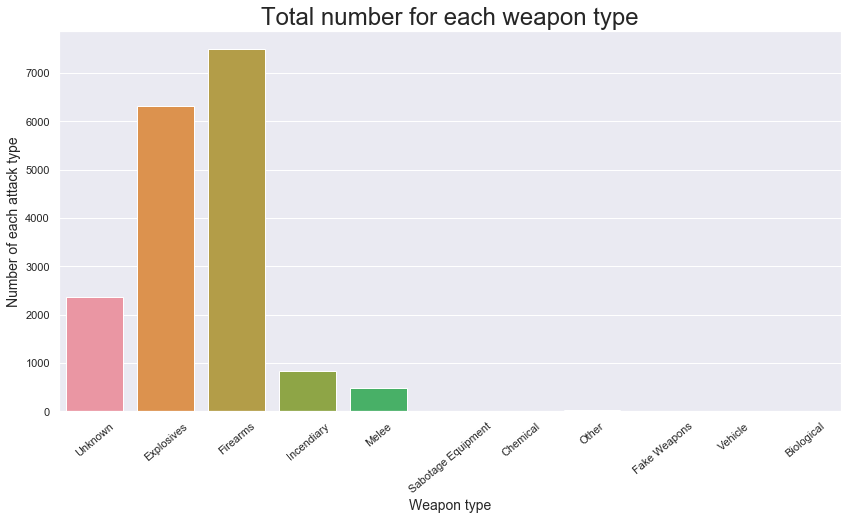

In [37]:
#This plot shows the types of weapons used in the Sub-Saharan region
plt.figure(figsize = (14,7))
weap = sns.countplot(sub_sahara["Weapon_type"])
plt.xlabel("Weapon type", fontsize = 14)
plt.ylabel("Number of each attack type", fontsize = 14)
plt.title("Total number for each weapon type", fontsize = 24)
weap.set_xticklabels(weap.get_xticklabels(), rotation=40);

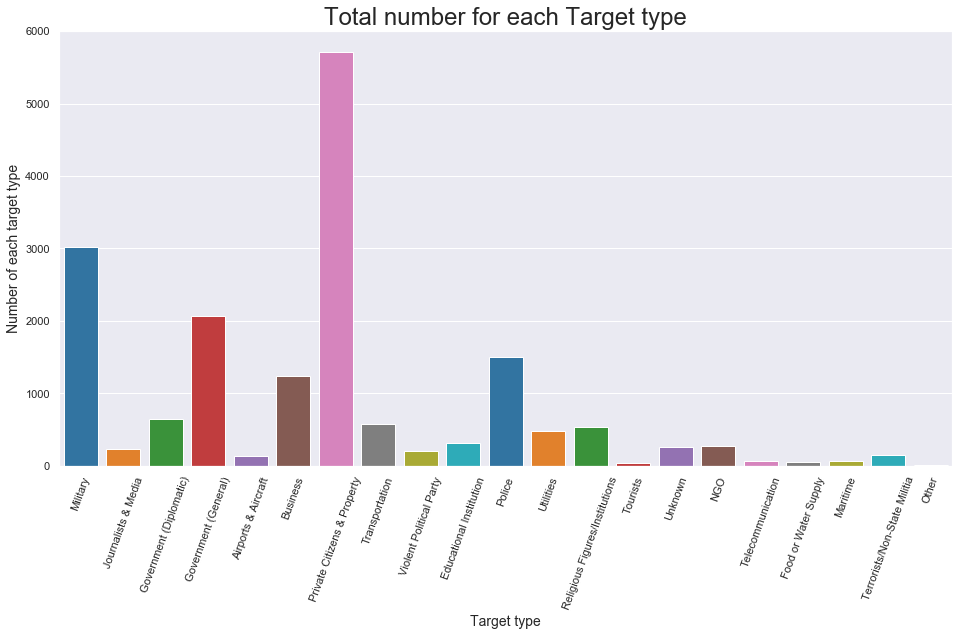

In [38]:
#This plot shows the attack targets in the Sub-Saharan region
plt.figure(figsize = (16,8))
targ = sns.countplot(sub_sahara["Target_type"], palette = "tab10")
plt.xlabel("Target type", fontsize = 14)
plt.ylabel("Number of each target type", fontsize = 14)
plt.title("Total number for each Target type", fontsize = 24)
targ.set_xticklabels(targ.get_xticklabels(), rotation=70);

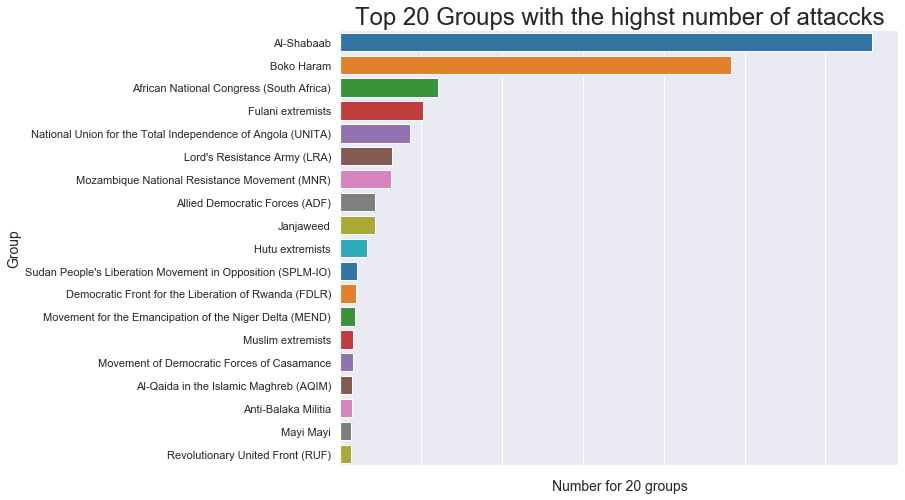

In [110]:
#This shows the top 20 groups with the most attacks on the Sub-saharan region
plt.figure(figsize = (10,8))
targ = sns.barplot(sub_sahara["Group"].value_counts()[1:20], sub_sahara["Group"].value_counts().index[1:20], palette = "tab10")
plt.xlabel("Number for 20 groups", fontsize = 14)
plt.ylabel("Group", fontsize = 14)
plt.title("Top 20 Groups with the highst number of attaccks", fontsize = 24)
targ.set_xticklabels(targ.get_xticklabels(), rotation=90);

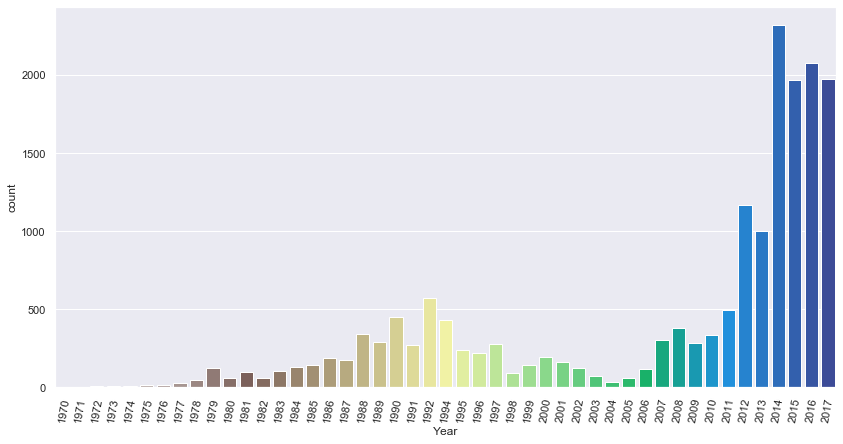

In [123]:
#This plot shows the number of attacks per year since 1970
plt.figure(figsize = (14,7))
year = sns.countplot(x = sub_sahara["Year"], palette = "terrain_r")
year.set_xticklabels(year.get_xticklabels(), rotation=80);

Text(0.5, 1.0, 'Terrorism attacks from 1970')

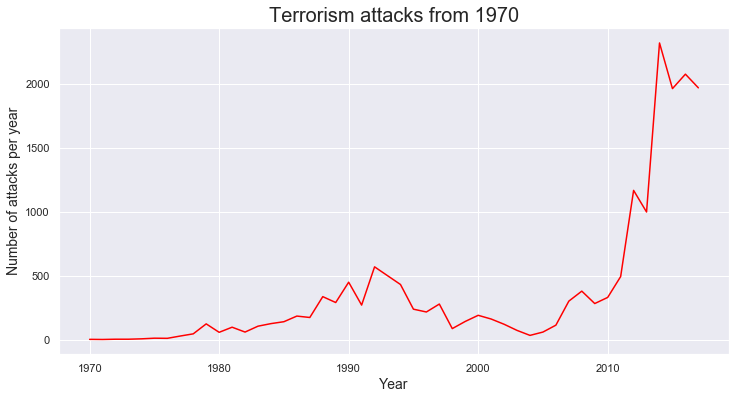

In [122]:
#This lineplot shows the trend of terrorism from 1970 to 2017
plt.figure(figsize = (12,6))
sns.lineplot(x = sub_sahara.Year.value_counts().index, y = sub_sahara.Year.value_counts(), color = "red")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Number of attacks per year", fontsize = 14)
plt.title("Terrorism attacks from 1970", fontsize = 20)

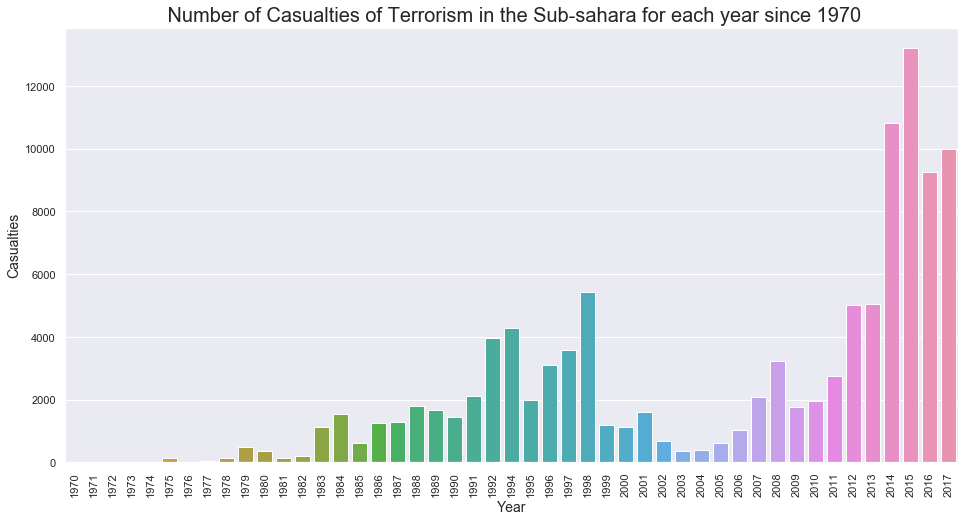

In [49]:
#This plot shows the number of casualties of terrorism in the Sub-saharan region over the years from 1970 to 2017cas_sub= sub_sahara.groupby('Year').Casualties.sum().to_frame().reset_index()
cas_sub.columns = ['Year','Casualties']
plt.figure(figsize = (16, 8))
ng_cas = sns.barplot(cas_sub["Year"], cas_sub["Casualties"])
plt.title(" Number of Casualties of Terrorism in the Sub-sahara each year since 1970", fontsize = 20)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Casualties", fontsize = 14)
ng_cas.set_xticklabels(ng_cas.get_xticklabels(), rotation=90);

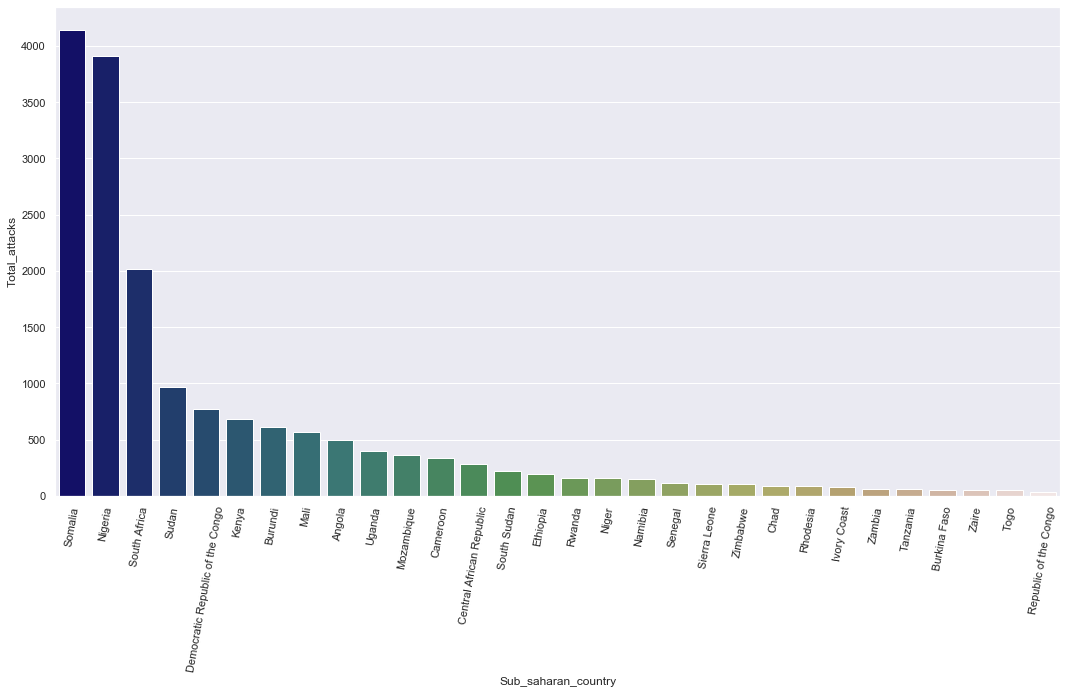

In [118]:
#This plot shows the top 30 countries in Sub-sahara with the most attacks
country_sub = sub_sahara.Country.value_counts()[:30].reset_index()
country_sub.columns = ["Sub_saharan_country", "Total_attacks"]
plt.figure(figsize = (18,9))
country = sns.barplot(x = country_sub["Sub_saharan_country"], y = country_sub["Total_attacks"], palette = "gist_earth")
country.set_xticklabels(country.get_xticklabels(), rotation=80);

### Terrorism in Nigeria (Data Visualisation)

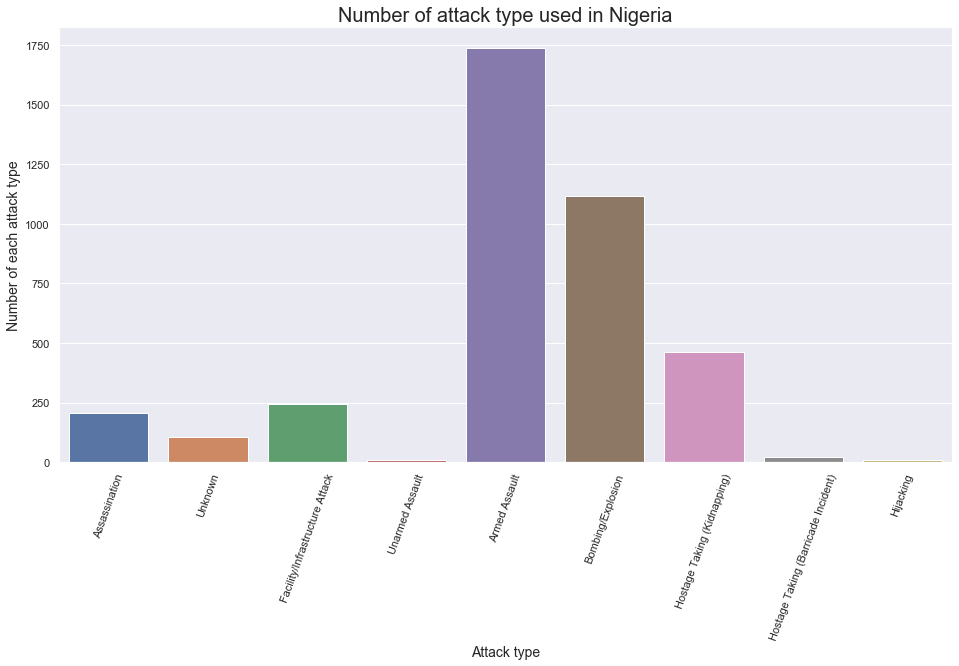

In [126]:
#Number of attack type used in Nigeria
plt.figure(figsize = (16, 8))
n_att = sns.countplot(naija_nig["AttackType"])
plt.xlabel("Attack type", fontsize = 14)
plt.ylabel("Number of each attack type", fontsize = 14)
plt.title("Number of attack type used in Nigeria", fontsize = 20)
n_att.set_xticklabels(n_att.get_xticklabels(), rotation = 70);

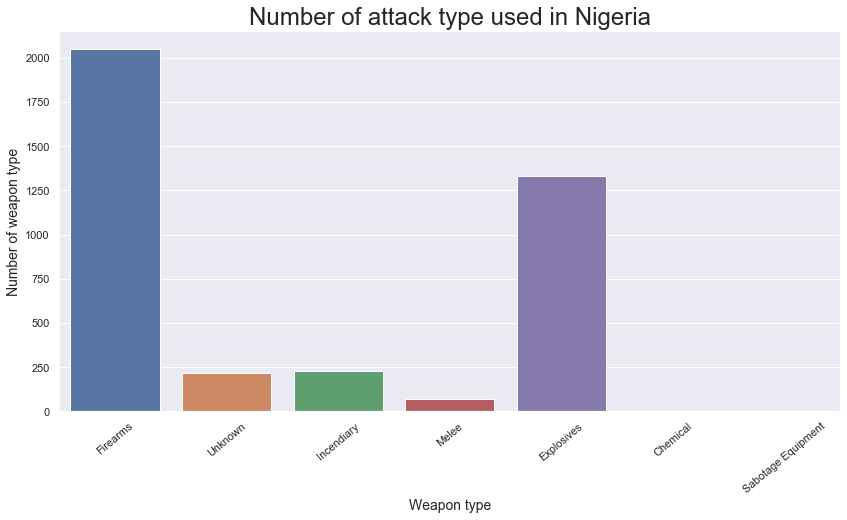

In [127]:
#This plot shoows the total number of Weapon type used in Nigeria
plt.figure(figsize = (14,7))
n_weap = sns.countplot( naija_nig["Weapon_type"])
plt.xlabel("Weapon type", fontsize = 14)
plt.ylabel("Number of weapon type", fontsize = 14)
plt.title("Number of attack type used in Nigeria", fontsize = 24)
n_weap.set_xticklabels(n_weap.get_xticklabels(), rotation=40);

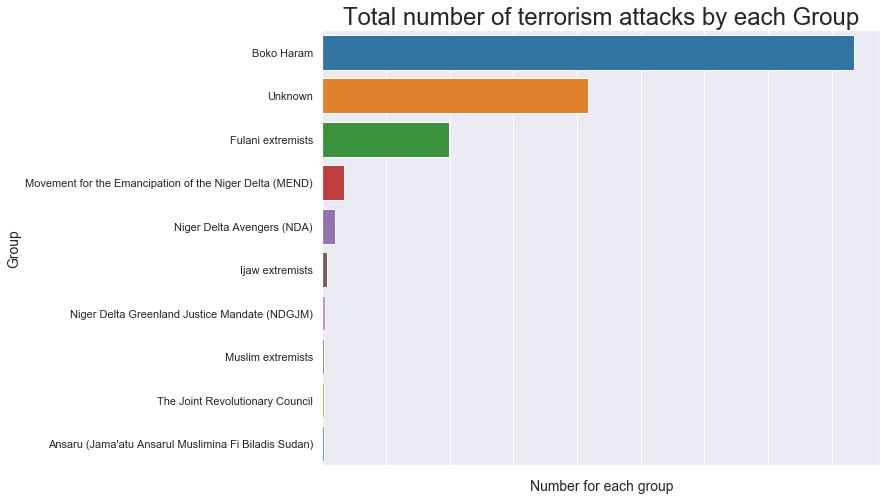

In [108]:
#This plot shows the number of attacks carried out by each group in Nigeria
plt.figure(figsize = (10,8))
targ = sns.barplot(naija_nig["Group"].value_counts()[0:10], naija_nig["Group"].value_counts().index[0:10], palette = "tab10")
plt.xlabel("Number for each group", fontsize = 14)
plt.ylabel("Group", fontsize = 14)
plt.title("Total number of terrorism attacks by each Group", fontsize = 24)
targ.set_xticklabels(targ.get_xticklabels(), rotation=90);

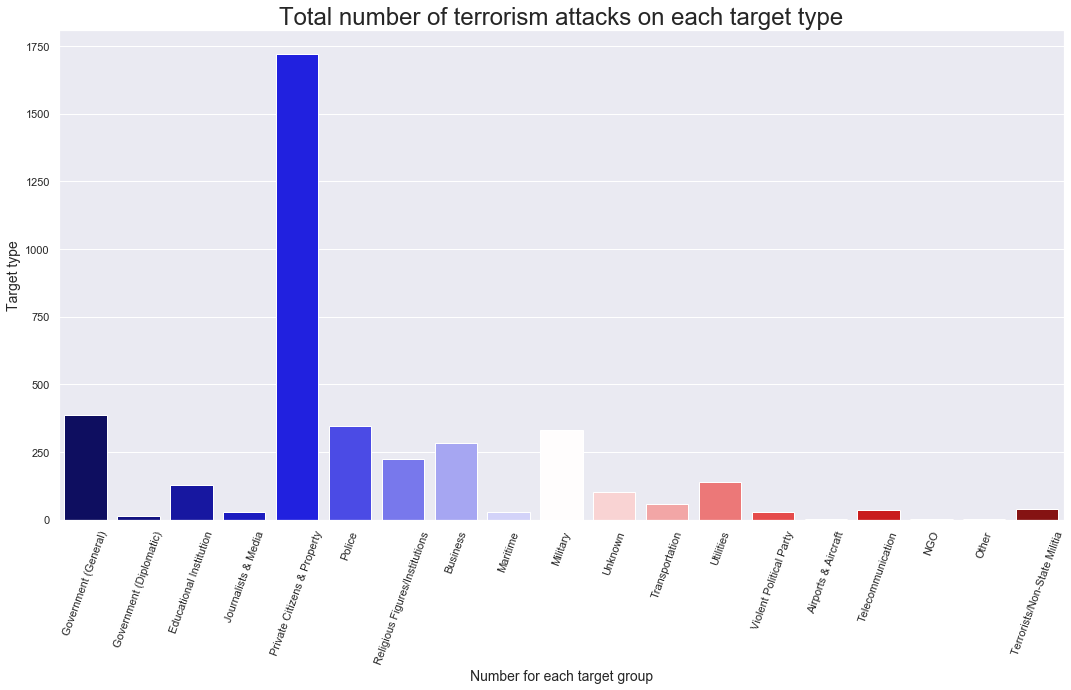

In [128]:
#This plot shows the number for each target type in Nigeria 
plt.figure(figsize = (18,9))
n_nig = sns.countplot(naija_nig["Target_type"], palette="seismic", dodge = True)
plt.xlabel("Number for each target group", fontsize = 14)
plt.ylabel("Target type", fontsize = 14)
plt.title("Total number of terrorism attacks on each target type", fontsize = 24)
n_nig.set_xticklabels(n_nig.get_xticklabels(), rotation=70);

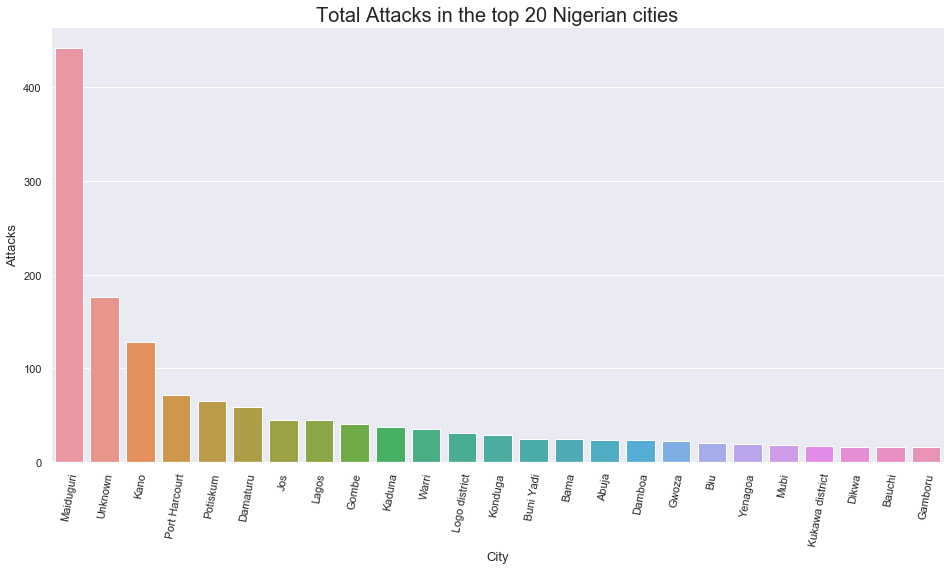

In [117]:
#This plot shows 25 cities with highest terrorism attacks 
plt.figure(figsize = (16, 8))
city_ng = sns.barplot(x = naija_nig.City.value_counts().index[0:25], y =naija_nig.City.value_counts()[0:25])
plt.title("Total Attacks on 25 Nigerian cities", fontsize = 20)
plt.xlabel("City", fontsize = 13)
plt.ylabel("Attacks", fontsize = 13)
city_ng.set_xticklabels(city_ng.get_xticklabels(), rotation = 80);

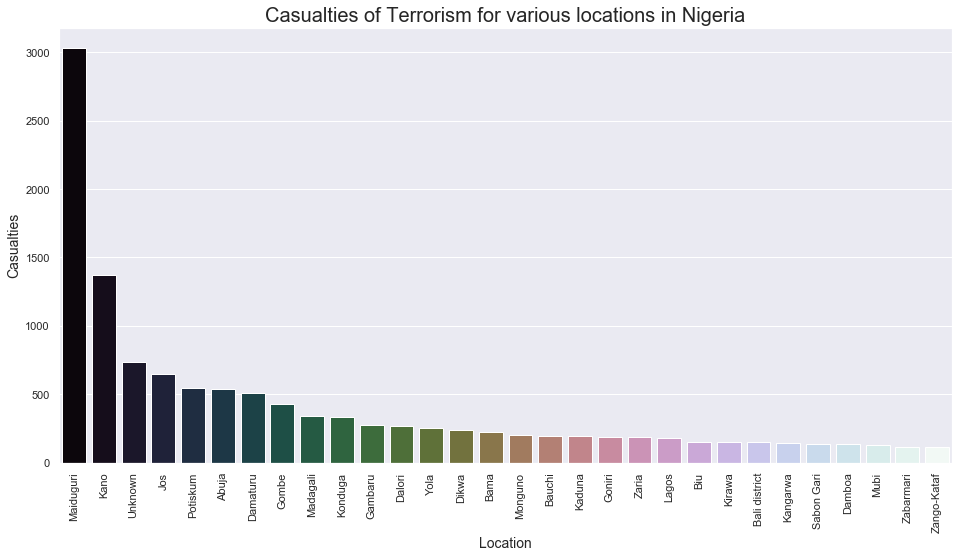

In [130]:
#This plot shows the casualties of terrorism in various locations in Nigeria
ng_cas= naija_nig.groupby('City').Casualties.sum().to_frame().reset_index()
ng_cas.columns = ['City','Casualties']
sort_ng = ng_cas.sort_values(by = ["Casualties"], ascending = False)
plt.figure(figsize = (16, 8))
city_sort = sns.barplot(sort_ng["City"][0:30], sort_ng["Casualties"][0:30], palette = "cubehelix")
plt.title("Casualties of Terrorism for various locations in Nigeria", fontsize = 20)
plt.xlabel("Location", fontsize = 14)
plt.ylabel("Casualties", fontsize = 14)
city_sort.set_xticklabels(city_sort.get_xticklabels(), rotation=90);

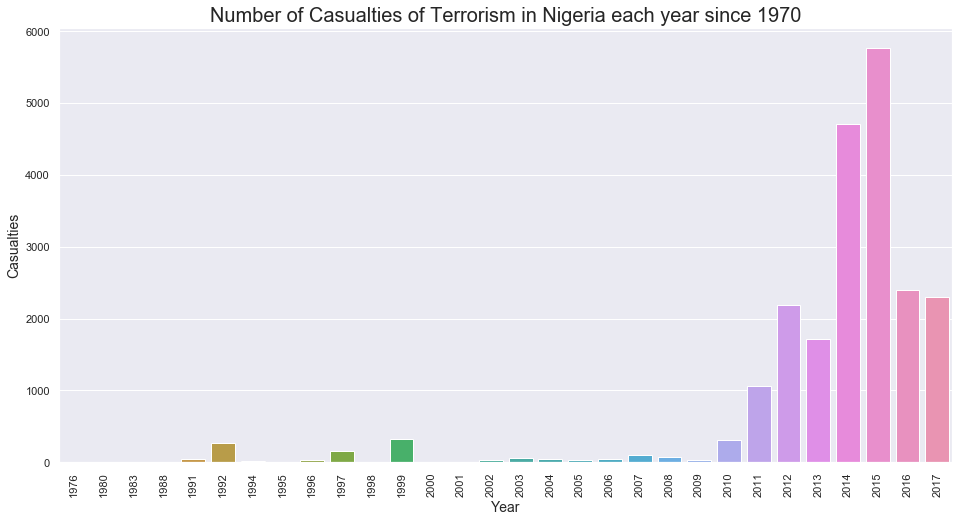

In [129]:
#This plot shows the number of casualties in Nigeria from 1970 to 2017
ng_cas= naija_nig.groupby('Year').Casualties.sum().to_frame().reset_index()
ng_cas.columns = ['Year','Casualties']
plt.figure(figsize = (16, 8))
ng_cas = sns.barplot(ng_cas["Year"], ng_cas["Casualties"])
plt.title("Number of Casualties of Terrorism in Nigeria each year since 1970", fontsize = 20)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Casualties", fontsize = 14)
ng_cas.set_xticklabels(ng_cas.get_xticklabels(), rotation=90);

Text(0.5, 1.0, 'Terrorism trend in Nigeria over the years')

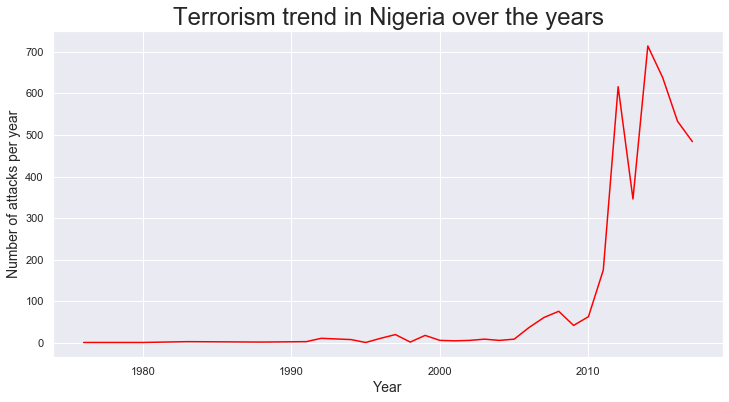

In [44]:
#This plot shows the trend of terrorism over the years in Nigeria from 1970 
plt.figure(figsize = (12,6))
sns.lineplot(x = naija_nig.Year.value_counts().index, y = naija_nig.Year.value_counts(), color = "red")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Number of attacks per year", fontsize = 14)
plt.title("Terrorism trend in Nigeria over the years", fontsize = 24)